In [1]:
import pandas as pd

#### load the identifications from TFD/E and MaxQuant

In [2]:
IDENTS_MQ_DIR = '/media/big-ssd/experiments/P3856_YHE211/identifications-mq'
IDENTS_MQ_FILE = '{}/exp-P3856_YHE211-identifications-mq.feather'.format(IDENTS_MQ_DIR)

In [3]:
idents_mq_df = pd.read_feather(IDENTS_MQ_FILE)
idents_mq_df = idents_mq_df[idents_mq_df.isotope_count >= 3]

In [4]:
sequences_mq_l = []
for group_name,group_df in idents_mq_df.groupby(['sequence','charge'], as_index=False):
    perc_score = group_df['percolator score'].max()
    mass_accuracy_ppm = group_df.mass_accuracy_ppm.min()
    sequences_mq_l.append({'sequence_key':'{}-{}'.format(group_name[0], group_name[1]), 'perc_score':perc_score, 'mass_accuracy_ppm':mass_accuracy_ppm, 'method':'MaxQuant'})
sequences_mq_df = pd.DataFrame(sequences_mq_l)
print('MaxQuant identified {} unique sequences'.format(len(sequences_mq_df)))

MaxQuant identified 9166 unique sequences


In [5]:
IDENTS_TFDE_DIR = '/media/big-ssd/experiments/P3856_YHE211/identifications-pasef'
IDENTS_TFDE_FILE = '{}/exp-P3856_YHE211-identifications-pasef-recalibrated.feather'.format(IDENTS_TFDE_DIR)

In [6]:
idents_tfde_df = pd.read_feather(IDENTS_TFDE_FILE)

In [7]:
sequences_tfde_l = []
for group_name,group_df in idents_tfde_df.groupby(['sequence','charge'], as_index=False):
    perc_score = group_df['percolator score'].max()
    mass_accuracy_ppm = group_df.mass_accuracy_ppm.min()
    sequences_tfde_l.append({'sequence_key':'{}-{}'.format(group_name[0], group_name[1]), 'perc_score':perc_score, 'mass_accuracy_ppm':mass_accuracy_ppm, 'method':'TFD/E'})
sequences_tfde_df = pd.DataFrame(sequences_tfde_l)
print('TFD/E identified {} unique sequences'.format(len(sequences_tfde_df)))

TFD/E identified 11013 unique sequences


In [8]:
run_name = 'minvi-600-2021-12-19-02-35-34'

In [9]:
IDENTS_3DID_DIR = '/media/big-ssd/results-P3856_YHE211-3did/{}/P3856_YHE211/identifications-3did'.format(run_name)
IDENTS_3DID_FILE = '{}/exp-P3856_YHE211-identifications-3did-recalibrated.feather'.format(IDENTS_3DID_DIR)

# load the 3DID results
idents_3did_df = pd.read_feather(IDENTS_3DID_FILE)

# find the unique sequences
sequences_3did_l = []
for group_name,group_df in idents_3did_df.groupby(['sequence','charge'], as_index=False):
    perc_score = group_df['percolator score'].max()
    mass_accuracy_ppm = group_df.mass_accuracy_ppm.min()
    sequences_3did_l.append({'sequence_key':'{}-{}'.format(group_name[0], group_name[1]), 'perc_score':perc_score, 'mass_accuracy_ppm':mass_accuracy_ppm, 'method':'3DID'})
sequences_3did_df = pd.DataFrame(sequences_3did_l)

In [10]:
from matplotlib import pyplot as plt
from upsetplot import from_contents
from upsetplot import generate_counts, plot

In [11]:
idents = from_contents({'3DID': sequences_3did_df['sequence_key'], 'TFD/E':sequences_tfde_df['sequence_key'], 'MaxQuant':sequences_mq_df['sequence_key']})

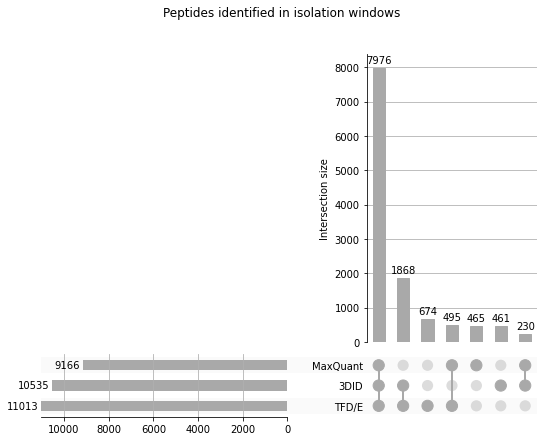

In [16]:
fig = plt.figure(figsize=(20, 10))
plot(idents, subset_size='count', sort_by='cardinality', show_counts=True, fig=fig, totals_plot_elements=10, intersection_plot_elements=12, facecolor="darkgray", other_dots_color=.4)
plt.suptitle('Peptides identified in isolation windows')
plt.show()